<a href="https://www.kaggle.com/code/abhisangharora/dm-proj?scriptVersionId=127781275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121859 (Custom).jpg
/kaggle/input/mango-leaf-disease-d

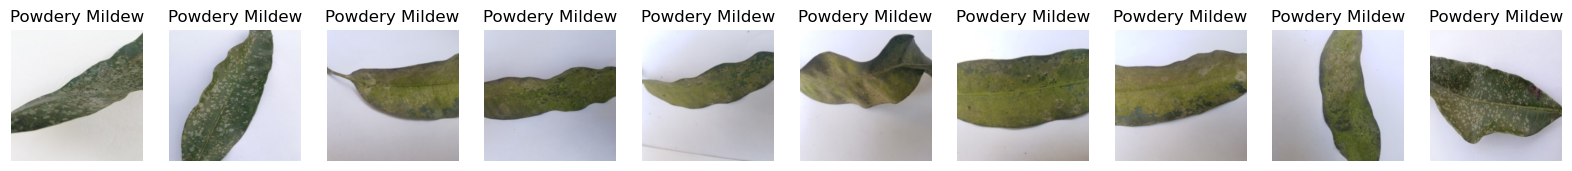

In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def visualize_dataset(data_dir, img_height, img_width, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for i in range(num_samples):
                file = random.choice(os.listdir(folder_path))
                file_path = os.path.join(folder_path, file)
                if file.endswith('.jpg') or file.endswith('.png'):
                    img = cv2.imread(file_path)
                    img = cv2.resize(img, (img_height, img_width))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[i].imshow(img)
                    axes[i].set_title(folder)
                    axes[i].axis('off')
            break

data_dir = '/kaggle/input/mango-leaf-disease-dataset'
img_height = 256
img_width = 256
visualize_dataset(data_dir, img_height, img_width)


In [8]:
def load_and_preprocess_data(data_dir, img_height, img_width):
    images = []
    labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.jpg') or file.endswith('.png'):
                    # Read image
                    img = cv2.imread(file_path)
                    # Resize image
                    img = cv2.resize(img, (img_height, img_width))
                    # Convert image to array
                    img_array = img_to_array(img)
                    # Normalize the image
                    img_array /= 255
                    # Append the image and label to the lists
                    images.append(img_array)
                    labels.append(folder)

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Convert the labels using one-hot encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return images, onehot_encoded, label_encoder

data_dir = '/kaggle/input/mango-leaf-disease-dataset'
img_height = 256
img_width = 256

X, y, label_encoder = load_and_preprocess_data(data_dir, img_height, img_width)


In [3]:
# Load and preprocess the dataset
# (Implement a function to load and preprocess the images, and convert the labels to a suitable format)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data into a 2D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Standardize the data for non-deep learning algorithms
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_val_std = scaler.transform(X_val_flat)


# Create a dictionary to store the results of each algorithm
results = {}





In [4]:
# CNN
# (Use the code from the previous response to implement the CNN, train the model, and evaluate the results)
# Determine the number of unique labels
num_classes = y.shape[1]

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)
print(classification_report(y_val_classes, y_pred_classes))
print(confusion_matrix(y_val_classes, y_pred_classes))

# Calculate the accuracy
cnn_accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Add the CNN's accuracy to the results dictionary
results['CNN'] = cnn_accuracy

Epoch 1/10
100/100 [==============================] - 270s 3s/step - loss: 1.2902 - accuracy: 0.4944 - val_loss: 0.9586 - val_accuracy: 0.6200
Epoch 2/10
100/100 [==============================] - 267s 3s/step - loss: 0.5623 - accuracy: 0.7834 - val_loss: 0.4743 - val_accuracy: 0.8150
Epoch 3/10
100/100 [==============================] - 267s 3s/step - loss: 0.3377 - accuracy: 0.8775 - val_loss: 0.3699 - val_accuracy: 0.8687
Epoch 4/10
100/100 [==============================] - 266s 3s/step - loss: 0.2899 - accuracy: 0.8916 - val_loss: 0.2609 - val_accuracy: 0.9000
Epoch 5/10
100/100 [==============================] - 267s 3s/step - loss: 0.1590 - accuracy: 0.9428 - val_loss: 0.2384 - val_accuracy: 0.9225
Epoch 6/10
100/100 [==============================] - 266s 3s/step - loss: 0.1422 - accuracy: 0.9497 - val_loss: 0.2749 - val_accuracy: 0.9100
Epoch 7/10
100/100 [==============================] - 265s 3s/step - loss: 0.1557 - accuracy: 0.9422 - val_loss: 0.2318 - val_accuracy: 0.9275

In [5]:
# Convert one-hot encoded labels back to their original format
y_train_classes = np.argmax(y_train, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_std, y_train_classes)
gnb_pred = gnb.predict(X_val_std)
gnb_accuracy = accuracy_score(y_val_classes, gnb_pred)
results['Naive Bayes'] = gnb_accuracy

# SVM


# SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_std, y_train_classes)
svm_pred = svm.predict(X_val_std)
svm_accuracy = accuracy_score(y_val_classes, svm_pred)
results['SVM'] = svm_accuracy

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
knn_pred = knn.predict(X_val_std)
knn_accuracy = accuracy_score(y_val, knn_pred)
results['KNN'] = knn_accuracy

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_std, y_train)
rf_pred = rf.predict(X_val_std)
rf_accuracy = accuracy_score(y_val, rf_pred)
results['Random Forest'] = rf_accuracy



Accuracy Scores:
CNN: 0.92625
Naive Bayes: 0.53875
SVM: 0.82125
KNN: 0.6425
Random Forest: 0.66125


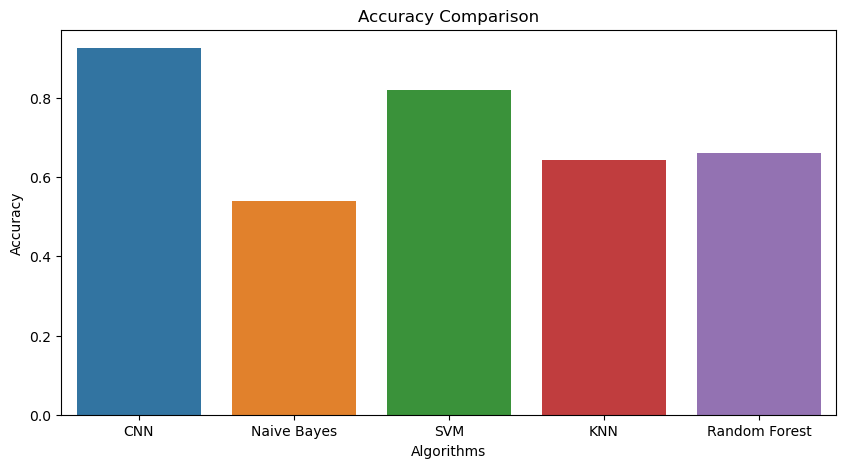

In [6]:


# Display the accuracy scores
print("Accuracy Scores:")
for algorithm, accuracy in results.items():
    print(f"{algorithm}: {accuracy}")

# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()
